# Capítulo 3: Python em Ação

## Analisando os dados sobre os servidores da UFMA

In [1]:
import pandas as pd

In [2]:
url_2020 = "http://dadosabertos.ufma.br/dataset/334d89c8-629f-49c5-aa06-171e35c1d33b/resource/55a2d103-d73b-449e-85bc-655df7dfc45a/download/docentes_-_2020.csv"

In [41]:
df = pd.read_csv(url_2020)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 125, saw 2


In [3]:
df = pd.read_csv(url_2020,sep=";")

In [4]:
df.head()

,nome,unidade,sexo,titulacao,Unnamed: 4
0,ALANA DAS CHAGAS FERREIRA AGUIAR,DEPARTAMENTO DE BIOLOGIA/CCBS,F,DOUTORADO,NaN
1,FREDERICO FERNANDO SOUZA SILVA,DEPARTAMENTO DE ARTES VISUAIS/CCH,M,DOUTORADO,NaN
2,ANDREA MARQUES DA SILVA PIRES,DEPARTAMENTO DE PATOLOGIA/CCBS,F,DOUTORADO,NaN
3,SARA FITERMAN LIMA,COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,F,DOUTORADO,NaN
4,ABIMAELSON SANTOS PEREIRA,DEPARTAMENTO DE ARTES CENICAS/CCH,M,MESTRADO,NaN


In [5]:
colunas = ['nome', 'unidade', 'sexo', 'titulacao']
df = pd.read_csv(url_2020,sep=";", usecols=colunas)
df.head()

,nome,unidade,sexo,titulacao
0,ALANA DAS CHAGAS FERREIRA AGUIAR,DEPARTAMENTO DE BIOLOGIA/CCBS,F,DOUTORADO
1,FREDERICO FERNANDO SOUZA SILVA,DEPARTAMENTO DE ARTES VISUAIS/CCH,M,DOUTORADO
2,ANDREA MARQUES DA SILVA PIRES,DEPARTAMENTO DE PATOLOGIA/CCBS,F,DOUTORADO
3,SARA FITERMAN LIMA,COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,F,DOUTORADO
4,ABIMAELSON SANTOS PEREIRA,DEPARTAMENTO DE ARTES CENICAS/CCH,M,MESTRADO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       1863 non-null   object
 1   unidade    1863 non-null   object
 2   sexo       1863 non-null   object
 3   titulacao  1863 non-null   object
dtypes: object(4)
memory usage: 58.3+ KB


In [7]:
df.unidade.value_counts().sort_values(ascending=False).head(10)

unidade
COLEGIO UNIVERSITARIO                                81
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST    60
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST     57
DEPARTAMENTO DE LETRAS/CCH                           47
DEPARTAMENTO DE MEDICINA I/CCBS                      45
DEPARTAMENTO DE DIREITO/CCSO                         44
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET    41
DEPARTAMENTO DE CIENCIAS FISIOLOGICAS/CCBS           40
DEPARTAMENTO DE COMUNICACAO SOCIAL/CCSO              40
DEPARTAMENTO DE EDUCACAO II/CCSO                     40
Name: count, dtype: int64

<Axes: xlabel='titulacao'>

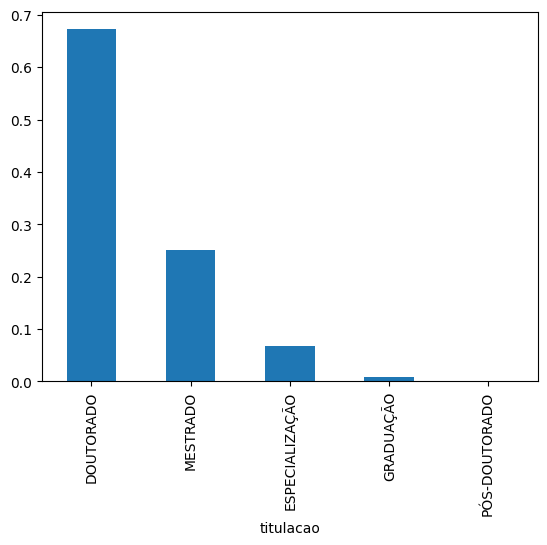

In [8]:
df['titulacao'].value_counts(normalize=True).plot(kind='bar')

In [9]:
df[df['titulacao'] == 'PÓS-DOUTORADO']

,nome,unidade,sexo,titulacao
245,EMILIE GENEVIEVE AUDIGIER,DEPARTAMENTO DE LETRAS/CCH,F,PÓS-DOUTORADO


In [10]:
df.loc[245].titulacao = 'DOUTORADO'

<Axes: xlabel='titulacao'>

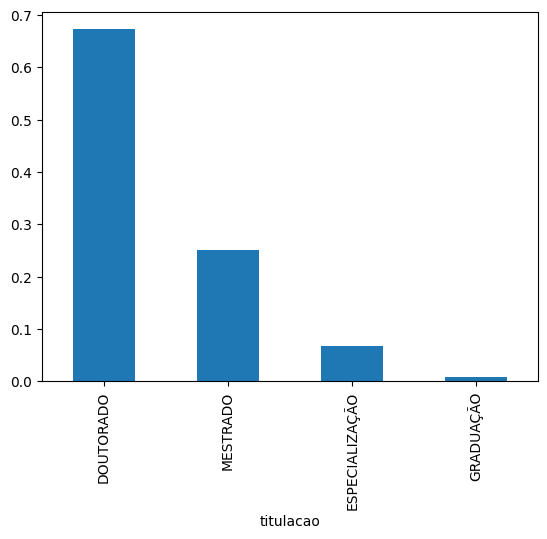

In [11]:
df['titulacao'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='sexo'>

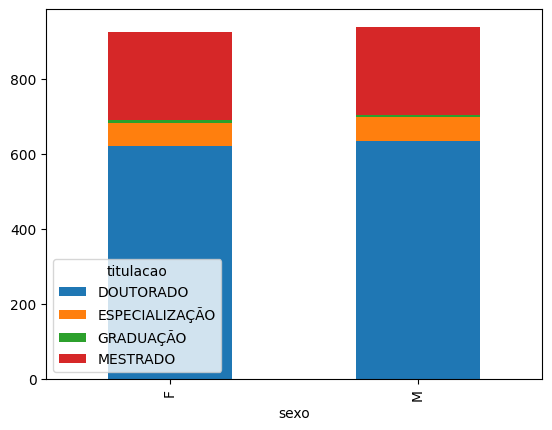

In [12]:
df.value_counts(['sexo','titulacao']).unstack().plot(kind='bar',stacked=True)

In [13]:
docentes_masculino = df.query("sexo=='M'").unidade.value_counts()
docentes_feminino = df.query("sexo=='M'").unidade.value_counts()

In [14]:
docentes_masculino.sort_values(ascending=False).head(10)

unidade
COLEGIO UNIVERSITARIO                                37
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET    29
DEPARTAMENTO  DE ENGENHARIA ELETRICA/CCET            28
DEPARTAMENTO DE DIREITO/CCSO                         27
DEPARTAMENTO DE MATEMATICA/CCET                      27
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST     27
DEPARTAMENTO DE MEDICINA I/CCBS                      23
DEPARTAMENTO DE FILOSOFIA/CCH                        22
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST    21
DEPARTAMENTO DE EDUCACAO FISICA/CCBS                 21
Name: count, dtype: int64

In [15]:
docentes_feminino.sort_values(ascending=False).head(10)

unidade
COLEGIO UNIVERSITARIO                                37
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET    29
DEPARTAMENTO  DE ENGENHARIA ELETRICA/CCET            28
DEPARTAMENTO DE DIREITO/CCSO                         27
DEPARTAMENTO DE MATEMATICA/CCET                      27
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST     27
DEPARTAMENTO DE MEDICINA I/CCBS                      23
DEPARTAMENTO DE FILOSOFIA/CCH                        22
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST    21
DEPARTAMENTO DE EDUCACAO FISICA/CCBS                 21
Name: count, dtype: int64

## Analisando os dados dos alunos ingressantes

In [16]:
import pandas as pd

In [17]:
url_2018= 'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv'

In [18]:
df_disc_2018 = pd.read_csv(url_2018, sep=';')

In [19]:
df_disc_2018.head()

,municipio,curso,grau,turno,modalidade,nivel,habilitacao,convenio,forma_ingresso,ano,periodo,quantidade,Unnamed: 12
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - AMPLA CONCORRÊNCIA,2018,1,24,NaN
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PÚBLICA,2018,1,2,NaN
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018,1,1,NaN
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO,2018,1,10,NaN
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018,1,1,NaN


In [20]:
df_disc_2018.columns

Index(['municipio', 'curso', 'grau', 'turno', 'modalidade', 'nivel',
       'habilitacao', 'convenio', 'forma_ingresso', 'ano', 'periodo',
       'quantidade', 'Unnamed: 12'],
      dtype='object')

In [21]:
colunas = ['municipio', 'curso', 'grau', 'turno','modalidade', 'nivel','forma_ingresso', 'ano', 'periodo','quantidade']

In [22]:
df_disc_2018 = pd.read_csv(url_2018, sep=';', usecols=colunas)

In [23]:
df_disc_2018.sort_values('quantidade')

,municipio,curso,grau,turno,modalidade,nivel,forma_ingresso,ano,periodo,quantidade
406,SÃO LUÍS,TEATRO,LICENCIATURA PLENA,Matutino,Presencial,G,SISU - ESCOLA PUBLICA - INDIO,2018,1,1
43,IMPERATRIZ,DIREITO,BACHARELADO,Noturno,Presencial,G,SISU - ESCOLA PUBLICA - RF,2018,1,1
46,IMPERATRIZ,ENFERMAGEM,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018,1,1
47,IMPERATRIZ,ENFERMAGEM,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - INDIO,2018,1,1
48,IMPERATRIZ,ENFERMAGEM,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - INDIO - RF,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
320,SÃO LUÍS,MATEMÁTICA,LICENCIATURA PLENA,Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,25
20,CHAPADINHA,ENGENHARIA AGRÍCOLA,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,27
231,SÃO LUÍS,ENGENHARIA CIVIL,BACHARELADO,"Matutino, Vespertino e Noturno",Presencial,G,REINGRESSO SEGUNDO CICLO,2018,1,36
124,SÃO LUÍS,CIÊNCIA E TECNOLOGIA,BACHARELADO,Noturno,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,44


In [24]:
df_disc_2018.groupby('curso')['quantidade']\
.sum()\
.sort_values(ascending=False)\
.head(10)

curso
CIÊNCIA E TECNOLOGIA               195
DIREITO                            123
MEDICINA                           109
PEDAGOGIA                          105
ENFERMAGEM                          92
CIÊNCIAS BIOLÓGICAS                 77
EDUCAÇÃO FÍSICA                     76
COMUNICAÇÃO SOCIAL - JORNALISMO     60
LETRAS - PORTUGUÊS                  47
ADMINISTRAÇÃO                       45
Name: quantidade, dtype: int64

In [25]:
df_disc_2018.groupby(['curso','municipio','turno'])['quantidade']\
.sum()\
.sort_values(ascending=False).head(10)

curso                            municipio   turno                
CIÊNCIA E TECNOLOGIA             SÃO LUÍS    Matutino                 98
                                             Noturno                  97
MEDICINA                         SÃO LUÍS    Matutino e Vespertino    53
ENFERMAGEM                       IMPERATRIZ  Matutino e Vespertino    48
LETRAS - PORTUGUÊS               BACABAL     Vespertino               47
COMUNICAÇÃO SOCIAL - JORNALISMO  IMPERATRIZ  Vespertino               46
ADMINISTRAÇÃO                    SÃO LUÍS    Matutino                 45
ENFERMAGEM                       SÃO LUÍS    Matutino e Vespertino    44
DIREITO                          SÃO LUÍS    Matutino                 44
                                             Noturno                  44
Name: quantidade, dtype: int64

In [26]:
 urls = [
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes_-_2020.2.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/61fff8f0-4c95-4293-9921-d3a92d09af26/download/alunos_ingressantes_-_2021-1.csv',
  'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/b473e197-50e5-4c2d-91ff-8bc2291cd9f3/download/alunos_ingressantes_-_2021.2.csv',
]

In [27]:
lista = [ 4, 8, 10, 20]
total = 0
for i in lista:
  total += i
print (total)

42


In [28]:
df_total = pd.DataFrame() # inicializa um dataframe vazio
for url in urls:
  print ("url:", url) # só para visualização
  df = pd.read_csv(url, sep=";", usecols=colunas)
  df_total = pd.concat([df_total, df])# acumula os dfs (valor)


url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv
url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv
url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv
url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv
url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv
url: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes_-_2020.2.csv
url:

In [29]:
def load_dataframe_by_urls(urls, cols):
  df_total = pd.DataFrame() # um dataframe vazio
  for url in urls:
    print ("URL:", url)
    df = pd.read_csv(url, sep=";", usecols=cols)
    df_total = pd.concat([df_total, df])
  return df_total

In [30]:
df_ingressantes = load_dataframe_by_urls(urls, colunas)

URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv
URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv
URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv
URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv
URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv
URL: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes_-_2020.2.csv
URL:

In [31]:
df_ingressantes.shape

(3421, 10)

In [32]:
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3421 entries, 0 to 427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipio       3421 non-null   object 
 1   curso           3421 non-null   object 
 2   grau            3421 non-null   object 
 3   turno           3421 non-null   object 
 4   modalidade      3421 non-null   object 
 5   nivel           3421 non-null   object 
 6   forma_ingresso  3421 non-null   object 
 7   ano             3420 non-null   float64
 8   periodo         3420 non-null   float64
 9   quantidade      3420 non-null   float64
dtypes: float64(3), object(7)
memory usage: 294.0+ KB


In [33]:
df_ingressantes['ano'].isna().sum()

np.int64(1)

In [34]:
df_ingressantes.dropna(inplace=True)

In [35]:
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipio       3420 non-null   object 
 1   curso           3420 non-null   object 
 2   grau            3420 non-null   object 
 3   turno           3420 non-null   object 
 4   modalidade      3420 non-null   object 
 5   nivel           3420 non-null   object 
 6   forma_ingresso  3420 non-null   object 
 7   ano             3420 non-null   float64
 8   periodo         3420 non-null   float64
 9   quantidade      3420 non-null   float64
dtypes: float64(3), object(7)
memory usage: 293.9+ KB


In [36]:
df_ingressantes['nome_completo'] = df_ingressantes['curso'] + ' - ' + df_ingressantes['municipio'] + ' - ' + df_ingressantes['turno']
df_ingressantes['nome_completo']

0      LETRAS - PORTUGUÊS - BACABAL - Vespertino
1      LETRAS - PORTUGUÊS - BACABAL - Vespertino
2      LETRAS - PORTUGUÊS - BACABAL - Vespertino
3      LETRAS - PORTUGUÊS - BACABAL - Vespertino
4      LETRAS - PORTUGUÊS - BACABAL - Vespertino
                         ...                    
423                TURISMO - SÃO LUÍS - Matutino
424                TURISMO - SÃO LUÍS - Matutino
425                TURISMO - SÃO LUÍS - Matutino
426                TURISMO - SÃO LUÍS - Matutino
427                TURISMO - SÃO LUÍS - Matutino
Name: nome_completo, Length: 3420, dtype: object

In [37]:
df_presencial = df_ingressantes.query("modalidade == 'Presencial'")

In [38]:
grupo = ['nome_completo','ano', 'periodo']
df_por_semestre = df_presencial.groupby(grupo)['quantidade'].sum()
df_por_semestre.head(10)

nome_completo                                   ano     periodo
ADMINISTRAÇÃO - SÃO LUÍS - Matutino             2018.0  1.0        45.0
                                                        2.0        55.0
                                                2019.0  1.0        47.0
                                                        2.0        46.0
                                                2020.0  1.0        36.0
                                                        2.0        41.0
                                                2021.0  1.0        49.0
                                                        2.0        47.0
AGRONOMIA - CHAPADINHA - Matutino e Vespertino  2018.0  1.0        38.0
                                                        2.0        33.0
Name: quantidade, dtype: float64

In [39]:
media_por_curso = df_por_semestre.groupby('nome_completo').mean()
media_por_curso.sort_values(ascending=False).head(10)

nome_completo
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Matutino                      112.625
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Noturno                       107.875
PEDAGOGIA - GRAJAÚ - Matutino e Vespertino                       84.000
PEDAGOGIA - LAGO DA PEDRA - Matutino e Vespertino                70.000
HISTÓRIA - LAGO DO JUNCO - Matutino e Vespertino                 60.000
PEDAGOGIA - LAGOA GRANDE DO MARANHÃO - Matutino e Vespertino     59.000
PEDAGOGIA - BURITI BRAVO - Matutino e Vespertino                 59.000
PEDAGOGIA - URBANO SANTOS - Matutino e Vespertino                58.000
CIÊNCIAS NATURAIS - BIOLOGIA - PINHEIRO - Noturno                57.750
CIÊNCIAS HUMANAS - SOCIOLOGIA - SÃO BERNARDO - Noturno           57.500
Name: quantidade, dtype: float64

In [40]:
media_por_curso.sort_values(ascending=True).head(10)

nome_completo
GEOGRAFIA - MARACAÇUMÉ - Matutino e Vespertino                            1.000
ENGENHARIA ELÉTRICA - BALSAS - Vespertino e Noturno                       1.000
CIÊNCIAS EXATAS - CENTRAL DO MARANHÃO - Matutino, Vespertino e Noturno    3.000
ENGENHARIA AMBIENTAL - BALSAS - Vespertino e Noturno                      3.000
ENGENHARIA AEROESPACIAL - SÃO LUÍS - Noturno                              4.000
ENGENHARIA MECÂNICA - SÃO LUÍS - Matutino e Vespertino                    5.375
MÚSICA - SÃO LUÍS - Matutino e Vespertino                                 6.000
ENGENHARIA AMBIENTAL E SANITÁRIA - SÃO LUÍS - Matutino e Vespertino       7.375
CIÊNCIAS EXATAS - PINDARÉ-MIRIM - Matutino, Vespertino e Noturno          9.000
LETRAS - FRANCÊS - SÃO LUÍS - Matutino                                    9.375
Name: quantidade, dtype: float64